特征名： ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
数据类型： <class 'numpy.ndarray'>
数据维度： (150, 4)
标记名： ['setosa' 'versicolor' 'virginica']
标记类型： <class 'numpy.ndarray'>
标记维度： (150,)
标记值为0的有: 50
标记值为1的有: 50
标记值为2的有: 50
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                 True              True               True              True
1                 True              True               True              True
2                 True              True               True              True
3                 True              True               True              True
4                 True              True               True              True
..                 ...               ...                ...               ...
145               True              True               True              True
146               True              True               True              True
147               True              True     

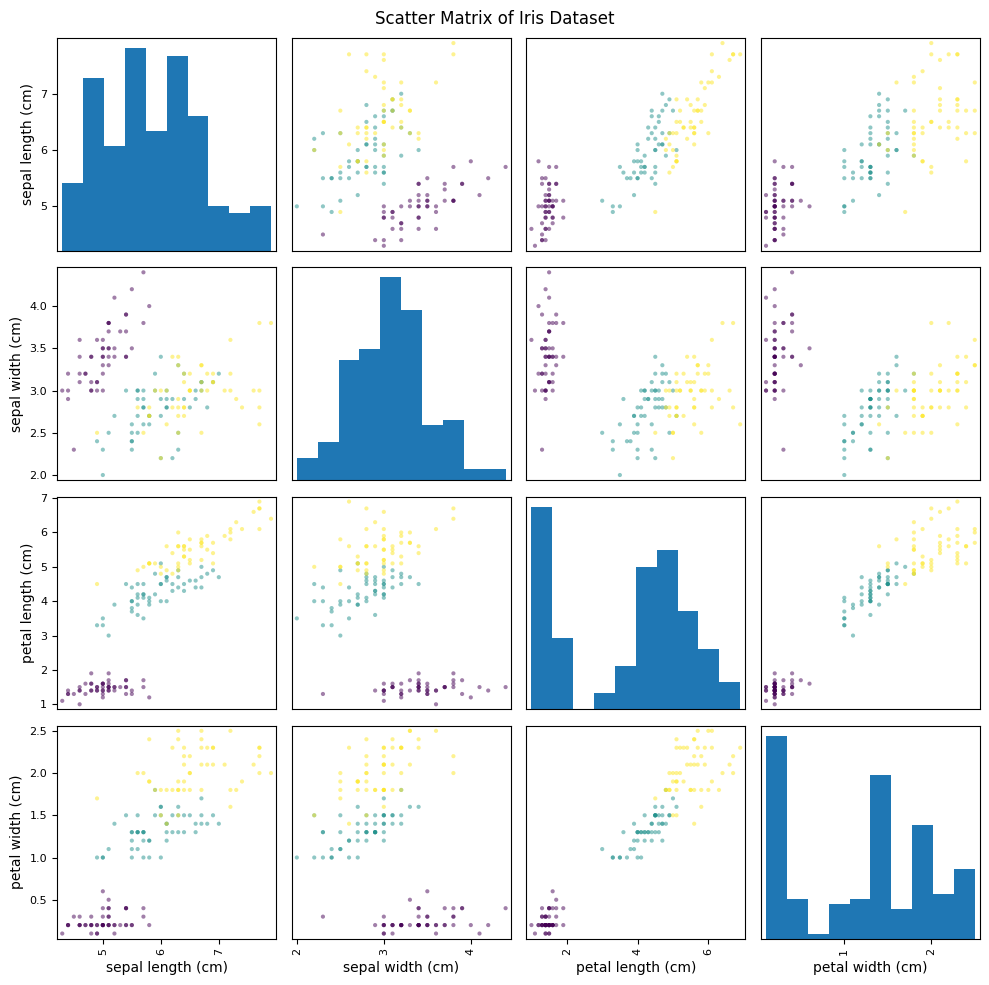

比较结果: [False  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True]
预测精确度: 0.9


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

iris_dataset = load_iris()

# 查看特征
print("特征名：", iris_dataset.feature_names)
print("数据类型：", type(iris_dataset.data))
print("数据维度：", iris_dataset.data.shape)

# 查看标记
print("标记名：", iris_dataset.target_names)
print("标记类型：", type(iris_dataset.target))
print("标记维度：", iris_dataset.target.shape)
print("标记值为0的有:", (iris_dataset.target == 0).sum())
print("标记值为1的有:", (iris_dataset.target == 1).sum())
print("标记值为2的有:", (iris_dataset.target == 2).sum())

# 创建DataFrame对象
iris_dataframe = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)

# 显示结果
print(iris_dataframe.notnull())

# 数据拆分
x_train, x_test, y_train, y_test = train_test_split(iris_dataset.data, iris_dataset.target, test_size=0.2)

# 查看拆分结果
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)

# 创建散点矩阵
scatter_matrix(iris_dataframe, alpha=0.5, figsize=(10, 10), grid=False, diagonal='hist', marker='.', range_padding=0.05, c=iris_dataset.target)
plt.suptitle("Scatter Matrix of Iris Dataset")
plt.tight_layout()
plt.show()

# 创建 StandardScaler 对象
transfer = StandardScaler()

# 对训练集进行标准化操作
x_train = transfer.fit_transform(x_train)

# 对测试集进行标准化操作
x_test = transfer.transform(x_test)

# 建立KNN模型
knn = KNeighborsClassifier(n_neighbors=5, algorithm='auto')

# 训练模型
knn.fit(x_train, y_train)

# 测试预测
predict_result = knn.predict(x_test)

# 输出预测值和真实值的比较结果
print('比较结果:', predict_result == y_test)

# 输出预测精确度
print('预测精确度:', knn.score(x_test, y_test))